In [26]:
# Importamos las librerías para trabajar con DFS(Depth-First Search)
# Búsqueda en profundidad

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from itertools import chain


In [27]:
def bfs(grafo, inicio, objetivo, imprimir=False):
    resultados = []
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        if imprimir:
            print("\nIteración:", i)
            print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            if imprimir:
                print("Camino encontrado:", "->".join(camino))
            resultados.append(camino)
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if imprimir:
                print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    if imprimir:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    # print("No se encontró un camino al nodo objetivo.")
    return resultados

In [28]:
def dfs(grafo, inicio, objetivo, visitados=None, camino=None, caminos_encontrados=None, i=0, imprimir=False):
    i += 1
    if imprimir:
        print("\nNivel de profundidad:", i)
    
    # Si entramos a este método por primera vez
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if imprimir:
        print("Nodo actual:", inicio)
    if imprimir:
        print("Nodos visitados", visitados)
    if imprimir:
        print("Camino Actual:", camino)

    if inicio == objetivo:
        if imprimir:
            print("Camino encontrado:", ' -> '.join(camino))
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, visitados, camino, caminos_encontrados, i)

    camino.pop()  # Eliminamos el último nodo para retroceder al nodo anterior
    visitados.remove(inicio)

    return caminos_encontrados


In [29]:
def busqueda(grafo, nodo_inicio, nodo_objetivo):
    print("Recorrido DFS:")
    caminos_encontrados = dfs(grafo, nodo_inicio, nodo_objetivo)

    if caminos_encontrados:
        print(f"Caminos encontrados {len(caminos_encontrados)}:")
        for camino in caminos_encontrados:
            print(' -> '.join(camino))
    else:
        print("No se encontró un camino al nodo objetivo.")
        
    print("Recorrido BFS:")
    caminos_encontrados = bfs(grafo, nodo_inicio, nodo_objetivo)

    if caminos_encontrados:
        print(f"Caminos encontrados {len(caminos_encontrados)}:")
        for camino in caminos_encontrados:
            print(' -> '.join(camino))
    else:
        print("No se encontró un camino al nodo objetivo.")
    return caminos_encontrados;


In [30]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'H', 'F'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['G', 'E', 'I'],
    'I': ['H', 'F']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'I'

caminos_encontrados = busqueda(grafo, nodo_inicio, nodo_objetivo)


Recorrido DFS:
Caminos encontrados 12:
A -> B -> C -> F -> E -> D -> G -> H -> I
A -> B -> C -> F -> E -> H -> I
A -> B -> C -> F -> I
A -> B -> E -> D -> G -> H -> I
A -> B -> E -> H -> I
A -> B -> E -> F -> I
A -> D -> E -> B -> C -> F -> I
A -> D -> E -> H -> I
A -> D -> E -> F -> I
A -> D -> G -> H -> E -> B -> C -> F -> I
A -> D -> G -> H -> E -> F -> I
A -> D -> G -> H -> I
Recorrido BFS:
Caminos encontrados 2:
A -> B -> C -> F -> I
A -> B -> E -> H -> I


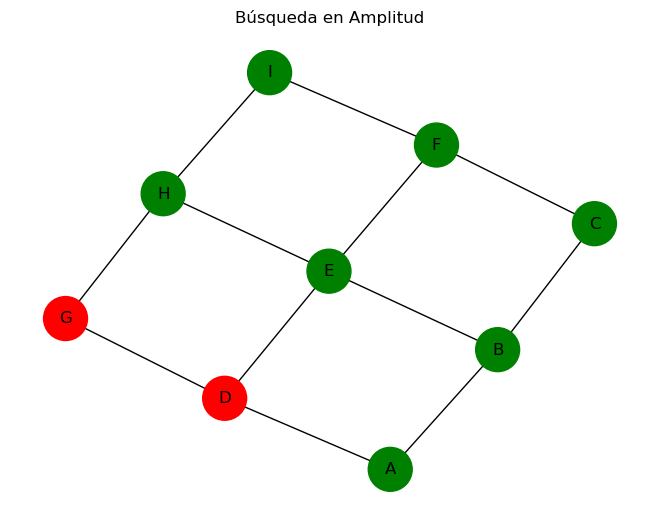

In [31]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en algún camino o no
colores = []
for nodo in G.nodes():
    en_camino = False
    for camino in caminos_encontrados:
        if nodo in camino:
            en_camino = True
            break
    if en_camino:
        colores.append('green')
    else:
        colores.append('red')

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()